In [1]:
import pandas as pd
import numpy as np

In [2]:
xls = pd.ExcelFile("Data/Train_dataset.xlsx")
df1 = pd.read_excel(xls, 'Diuresis_TS')

In [3]:
df1.head()

,people_ID,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00
0,1,441,544.2,669.64,821.368,1002.2416,1215.68992,1472.627904
1,2,151,197.2,253.24,321.688,399.9256,492.91072,606.892864
2,3,416,515.2,632.44,776.728,947.7736,1150.32832,1395.793984
3,4,410,506.0,621.40,761.880,928.1560,1126.78720,1368.344640
4,5,390,483.0,595.00,730.200,892.8400,1084.40800,1315.889600


In [4]:
df1 = df1.set_index("people_ID")

In [5]:
len(df1)

10714

0
1
2
3
4
5
6
7
8
9


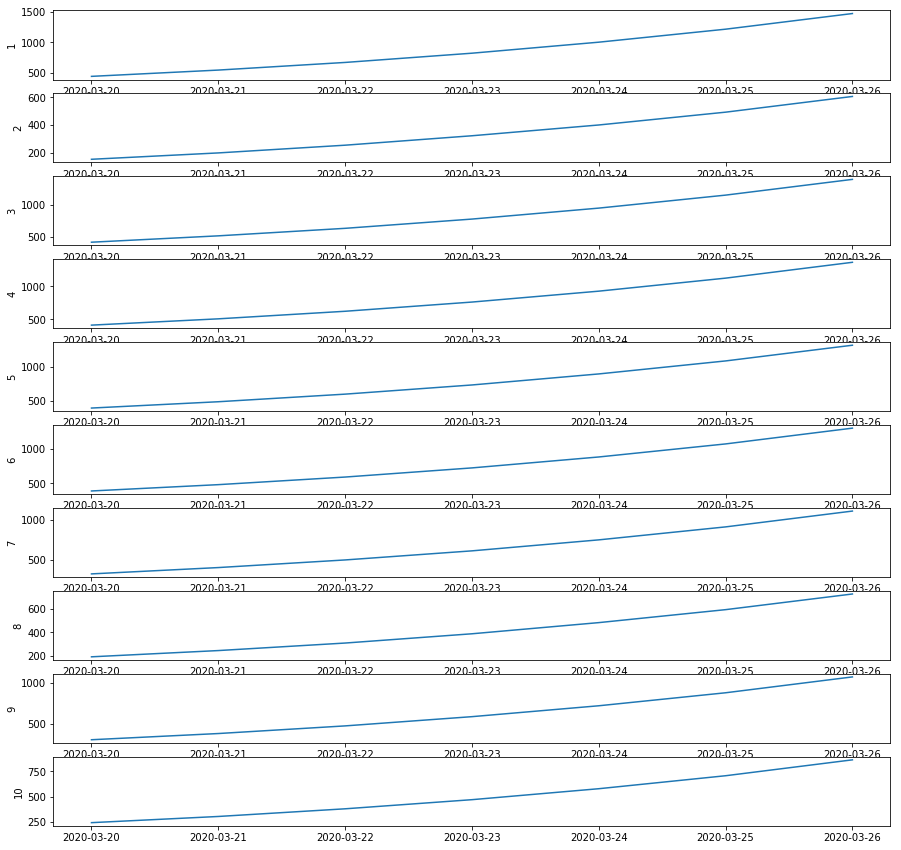

In [7]:
### PLOT TIME SERIES ####
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(10,1,figsize=(15,15))
count = 0
for i in range(10):
    print(i)
    sns.lineplot(df1.columns,df1.iloc[i,:],ax=ax[i])
    count+=1
    if(count==10):
        break

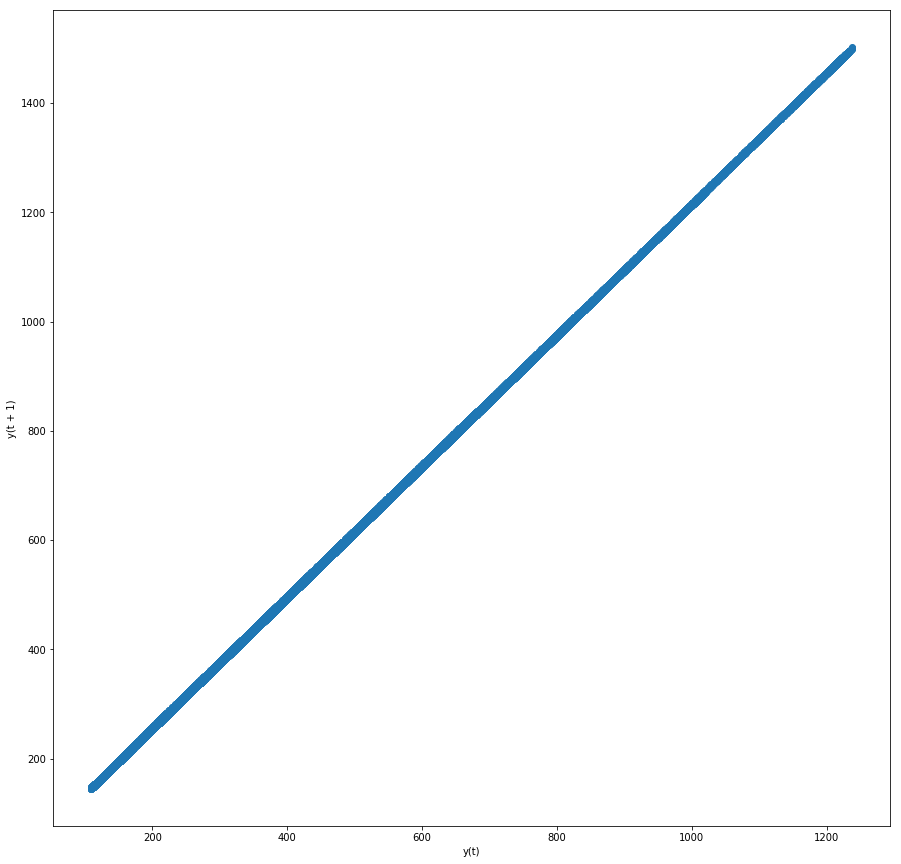

In [8]:
from pandas.plotting import lag_plot
fig = plt.figure(figsize=(15,15))
lag_plot(df1.transpose())

In [9]:
df1.transpose().head()

people_ID,1,2,3,4,5,6,7,8,9,10,...,22686,22687,22688,22689,22690,22691,22692,22693,22694,22695
2020-03-20 00:00:00,441.0000,151.0000,416.0000,410.000,390.00,389.0000,322.0000,194.0000,310.000,242.0000,...,339.0000,241.0000,183.0000,297.0000,397.0000,134.0000,387.0000,177.0000,352.0000,181.0000
2020-03-21 00:00:00,544.2000,197.2000,515.2000,506.000,483.00,480.8000,401.4000,246.8000,385.000,303.4000,...,420.8000,305.2000,232.6000,370.4000,489.4000,173.8000,479.4000,228.4000,438.4000,230.2000
2020-03-22 00:00:00,669.6400,253.2400,632.4400,621.400,595.00,591.1600,497.0800,310.3600,477.400,379.4800,...,519.1600,382.8400,293.3200,459.8800,603.8800,225.1600,591.8800,288.2800,542.6800,290.4400
2020-03-23 00:00:00,821.3680,321.6880,776.7280,761.880,730.20,723.9920,611.0960,388.6320,589.080,469.9760,...,639.1920,477.2080,368.1840,568.0560,742.4560,287.9920,724.8560,362.1360,665.8160,366.3280
2020-03-24 00:00:00,1002.2416,399.9256,947.7736,928.156,892.84,882.6904,749.0152,482.9584,720.796,578.7712,...,780.9304,588.3496,458.4208,698.2672,906.6472,359.4904,884.6272,448.4632,814.6792,455.2936


In [10]:
### Calculate Auto Correlation ###
values = pd.DataFrame(df1.iloc[:,0].transpose().values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
dataframe.corr()

,t-1,t+1
t-1,1.000000,-0.013092
t+1,-0.013092,1.000000


In [11]:
dataframe.head()

,t-1,t+1
0,NaN,441
1,441.0,151
2,151.0,416
3,416.0,410
4,410.0,390


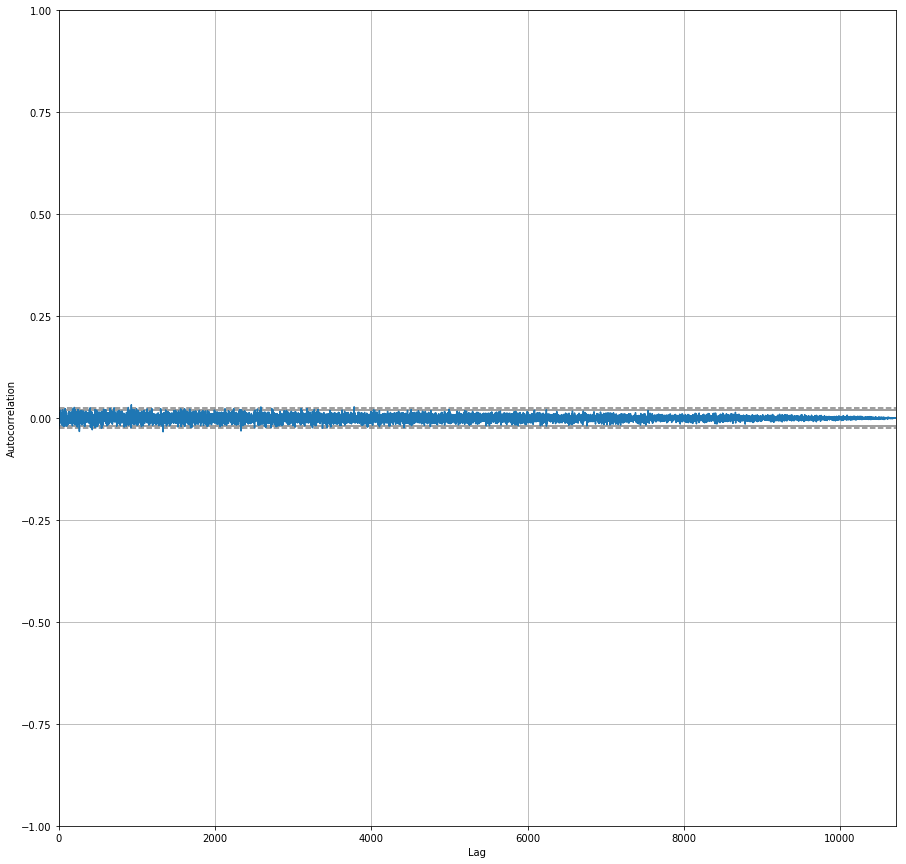

In [13]:
from pandas.plotting import autocorrelation_plot
fig = plt.figure(figsize=(15,15))
autocorrelation_plot(df1.iloc[:,0].transpose())

In [255]:
X = df1.iloc[0,:].values
train, test = X[1:len(X)-1], X[len(X)-1:]
#train_X, train_y = train[:,0], train[:,1]
#test_X, test_y = test[:,0], test[:,1]
from statsmodels.tsa.ar_model import AR
model = AR(train)
model_fit = model.fit(maxlag=2)
predictions = model_fit.predict(start=len(train_X), end=len(train_X)+len(test_X)-1, dynamic=False)
print(predictions,test)
#error = mean_squared_error(test, predictions)
#print('Test MSE: %.3f' % error)

[1215.68992] [1472.627904]


In [237]:
train_X

array([230.2   , 290.44  , 366.328 , 455.2936])

In [15]:
def model_persistence(x):
	return x
 
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)

In [16]:
from sklearn.metrics import mean_squared_error
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

Test MSE: 29241.000


In [17]:
import sys
print(sys.version)

3.5.2 (default, Oct  8 2019, 13:06:37) 
[GCC 5.4.0 20160609]


In [39]:
'''from statsmodels.tsa.ar_model import AR
X = df1.iloc[1,:].transpose().values
train, test = X[1:len(X)-1], X[len(X)-1:]
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)'''

"from statsmodels.tsa.ar_model import AR\nX = df1.iloc[1,:].transpose().values\ntrain, test = X[1:len(X)-1], X[len(X)-1:]\nmodel = AR(train)\nmodel_fit = model.fit()\nprint('Lag: %s' % model_fit.k_ar)\nprint('Coefficients: %s' % model_fit.params)"

In [128]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing
# prepare data
data = X[:6]
# create class
model = ExponentialSmoothing(data)
# fit model
model_fit = model.fit(smoothing_level=0.99)
# make prediction
yhat = model_fit.forecast()

In [94]:
for i in range(len(df1)):
    time_series = df1.iloc[i,:]
    data = time_series[:7]
    test.append(time_series[7])

2020-03-20     441.000000
2020-03-21     544.200000
2020-03-22     669.640000
2020-03-23     821.368000
2020-03-24    1002.241600
2020-03-25    1215.689920
2020-03-26    1472.627904
Name: 1, dtype: float64

In [103]:
X[:6]

array([151.     , 197.2    , 253.24   , 321.688  , 399.9256 , 492.91072])

In [8]:
## AUTO REGRESSION MODEL ###
from sklearn.linear_model import LinearRegression
test_list = []
pred_list = []
for i in range(df1.shape[0]):
    values = pd.DataFrame(df1.iloc[i,:].values)
    dataframe = pd.concat([values.shift(1), values], axis=1)
    dataframe.columns = ['t-1', 't+1']
    dataframe = dataframe.dropna()
    X = dataframe.values
    train, test = X[1:len(X)-1], X[len(X)-1:]
    train_X, train_y = train[:,0], train[:,1]
    test_X, test_y = test[:,0], test[:,1]
    test_list.append(test_y)
    lr = LinearRegression()
    dataframe = dataframe.dropna()
    lr.fit(train_X.reshape(-1,1),train_y.reshape(-1,1))
    pred = lr.predict(test_X.reshape(-1,1))
    pred_list.append(pred)
    

In [222]:
from sklearn.metrics import mean_squared_error
mean_squared_error(np.array(pred_list)[0],np.array(test_list)[0])

2.6382639057187665

In [224]:
train_X

array([230.2   , 290.44  , 366.328 , 455.2936])

In [225]:
lr.predict(train_X.reshape(-1,1))

array([[292.37888705],
       [364.11580903],
       [454.48718246],
       [560.43204146]])

In [31]:
final_list = []
for i in range(df1.shape[0]):
    values = df1.iloc[i,:].values
    pred = lr.predict(values[-1].reshape(-1,1))
    final_list.append(pred[0])
    

In [34]:
df_t_C = pd.DataFrame(final_list)
df_t_C.index = df1.index
df_t_C.to_csv("outputs/d_ts.csv")


/home/rosguy/.local/lib/python3.5/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning

ValueError: maxlag should be < nobs